<a href="https://colab.research.google.com/github/khalilAhmad10/Neural-network-from-scratch/blob/master/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'''
this project has 3 parts
part 1 is data entry and preprocessing part
part 2 is model of neural network
model has 2 hidden layers and 1 output layer

part 3 is running the model
'''



 **PART 1**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import io


In [ ]:
# upload input features and labels
print('Enter Features file\n')
inputs = files.upload()   
train = pd.read_csv(io.BytesIO(inputs['ww_inputs.csv'])) 
print('input the labels file\n')
outputs = files.upload() 
test = pd.read_csv(io.BytesIO(outputs['ww_labels.csv'])) 
X = train.values

Enter Features file



Saving ww_inputs.csv to ww_inputs.csv
input the labels file



Saving ww_labels.csv to ww_labels.csv


In [ ]:
#scalling the data

x = (X - np.min(X)) / (np.max(X)-np.min(X) )
y= test.values/10000

In [ ]:
# train-validate-test-split 

data = np.hstack((x, y))
split_factor = 0.80
split = int(split_factor * data.shape[0]) 
# here  the data into 80% training and 20% testing data
Xtrain = data[:split, :-1] 
Ytrain = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1)) 

In [ ]:
#here i further devided the trainig data into 80% which is 60% of data and validation data into 20%
data1 = np.hstack((Xtrain, Ytrain))
X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_val = data[split:, :-1] 
y_val = data[split:, -1].reshape((-1, 1)) 
print(('training set shape',np.shape(X_train)))
print("Number of examples in training set = % d"%(X_train.shape[0])) 
print("Number of examples in validatioin set = % d"%(X_val.shape[0]))
print("Number of examples in testing set = % d"%(X_test.shape[0]))


('training set shape', (53573, 17))
Number of examples in training set =  53573
Number of examples in validatioin set =  13394
Number of examples in testing set =  13394



'''
                      part 2
'''

In [ ]:
#creating a neural network from scratch
class NEURALN():
  # parameters initialization
  def __init__(self):   
    np.random.seed(1)
    self.w1 = np.random.randn(17,128)
    self.b1 = np.random.randn(1, 128)
    self.w2 = np.random.randn(64,128)
    self.b2 = np.random.randn (1,64)
    self.w3 = np.random.randn(1,64)
    self.b3 = np.random.randn (1,1) 
  
# this is fucntion for creating mini batches
  def create_mini_batches(self,X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
    for i in range(n_minibatches + 1): 
      mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
      X_mini = mini_batch[:, :-1] 
      Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
      mini_batches.append((X_mini, Y_mini)) 
      if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

#activation_function
  def relu(self,X):
    return np.maximum(X, 0)
      

# function to compute the error for current values of theta 
  def cost(self,X, y): 
    h = self.prediction(X) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 

#prediction_function that consist total of three layers two hidden and one output layer
  def prediction(self,X):

    l1  =  np.dot(X,self.w1) + self.b1
    a_l1 = self.relu(l1)
    l2  =  np.dot(a_l1,self.w2.T)   + self.b2
    a_l2 = self.relu(l2)
    output  =  np.dot(a_l2,self.w3.T)   + self.b3
    return output 

#training_function
  def training(self,X, y, learning_rate = 0.01, batch_size = 5000):
    self.error_list = []
    ephocs = 50
    l=len(X)
    for itr in range(ephocs): 
      n = np.float(x.shape[0]) # total number of samples
      mini_batches = self.create_mini_batches(X, y, batch_size) 
      for mini_batch in mini_batches: 
        X_mini, y_mini = mini_batch
        
        lambd = 5
        m = np.size(X_mini) 
                                                                 
        l1  =  np.dot(X_mini,self.w1) + self.b1                       #l1,l2,l3 are layer 1, 2 and 3 respectively
        a_l1 = self.relu(l1)
        l2  =  np.dot(a_l1,self.w2.T)   + self.b2
        a_l2 = self.relu(l2)
        l3  =  np.dot(a_l2,self.w3.T)   + self.b3
        slope1 = np.sum(np.dot(X_mini.T,(a_l1-y_mini))) + (lambd/m)*self.w1  # adding regularizatoin factor in weight 1
        intecept1=np.sum(a_l1-y_mini)
        slope2 = np.sum(np.dot(X_mini.T,(a_l2-y_mini)))  + (lambd/m)*self.w2    # adding regularizatoin factor in weight 2
        intecept2=np.sum(a_l2-y_mini)
        slope3    = np.sum(np.dot(X_mini.T,(l3-y_mini)))  + (lambd/m)*self.w3    # adding regularizatoin factor in weight 3
        intecept3 = np.sum(l3-y_mini)
        self.w1 = self.w1 - learning_rate * (slope1/l) 
        self.b1 = self.b1 - learning_rate *(intecept1/l)
        self.w2 = self.w2 - learning_rate *(slope2/l)
        self.b2 = self.b2 - learning_rate *(intecept2/l)
        self.w3 = self.w3 - learning_rate *(slope3/l)
        self.b3 = self.b3 - learning_rate *(intecept3/l)

        #calculating the l2 regularization costcode here      
        L2_regularization_cost = (np.sum(np.square(self.w1)) + np.sum(np.square(self.w2)) + np.sum(np.square(self.w3)))*(lambd/(2*m))
        total_cost = self.cost(X_mini, y_mini)  +        L2_regularization_cost 
        self.error_list.append(total_cost)  


#defining a function for calculating the validation set loss  
  def valid(self, x_val,y_val):# creating a function to find validation set loss
    self.lossv = [] # array for storing validation loss  
    batch_size = 100
    mini_batches = self.create_mini_batches(X, y, batch_size) 
    for mini_batch in mini_batches: 
      X_mini, y_mini = mini_batch
      self.lossv.append(self.cost(X_mini, y_mini))  
      

#defining a function for calculating the test set loss
  def test(self, x_test,y_test):
    self.losst = [] # array for storing error
    batch_size = 100
    mini_batches = self.create_mini_batches(X, y, batch_size) 
    for mini_batch in mini_batches: 
      X_mini, y_mini = mini_batch
      self.losst.append(self.cost(X_mini, y_mini)) 

'''
                                  part 3
'''


shape of w1 is (17, 128)
shape of b1 is (1, 128)
shape of w2 is (64, 128)
shape of b2 is (1, 64)
shape of w3 is (1, 64)
shape of b3 is (1, 1)
training loss [array([29792963.30462495]), array([89422096.60214819]), array([7546395.39213399]), array([30593592.56097906]), array([2957616.35949128]), array([12558211.18618749]), array([1352353.39896158]), array([6139158.62548121]), array([757537.31082487]), array([4313889.71933758]), array([652400.05544445]), array([3373619.66464559]), array([577394.94153694]), array([2564619.41048812]), array([537412.93960083]), array([1929475.19047183]), array([505086.93495845]), array([1348016.34975556]), array([494729.62493265]), array([850763.82223166]), array([357822.2019679]), array([360018.09635866]), array([486552.67251954]), array([5014563.98048996]), array([460111.20182756]), array([4407401.54931333]), array([457308.09829856]), array([3906078.38438222]), array([454040.51302451]), array([3374941.15889558]), array([442186.43678626]), array([2824904.65

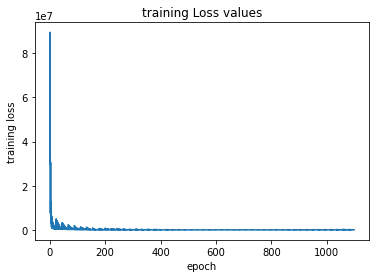

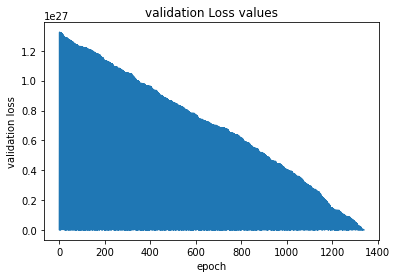

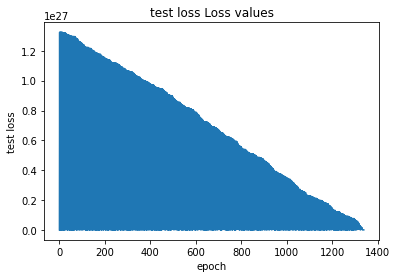

In [ ]:




if __name__ == "__main__":

    #Intialise linear regression model.
    nn = NEURALN() # initializing the linear regression class
    nn.training(X_train , y_train)
    print('shape of w1 is',np.shape(nn.w1))
    print('shape of b1 is',np.shape(nn.b1))
    print('shape of w2 is',np.shape(nn.w2))
    print('shape of b2 is',np.shape(nn.b2))
    print('shape of w3 is',np.shape(nn.w3))
    print('shape of b3 is',np.shape(nn.b3))

# in these below lines if want can print initail and final values

    #print("initial value of B1 is  = ", nn.b1[0]) 
    #print("final value of B1 is  = ", nn.b1[-1]) 
    #print("initial value of w1 is  = ", nn.w1[0]) 
    #print("final value of w1 is ", nn.w1[-1]) 
    #print("initial value of B2 is  = ", nn.b2[0]) 
    #print("final value of B2 is  = ", nn.b2[-1]) 
    #print("initial value of w2 is  = ", nn.w2[0]) 
    #print("final value of w2 is ", nn.w2[-1]) 
    #print("initial value of B3 is  = ", nn.b3[0]) 
    #print("final value of B3 is  = ", nn.b3[-1]) 
    #print("initial value of w3 is  = ", nn.w3[0]) 
    #print("final value of w3 is ", nn.w3[-1]) 
    nn.valid(X_val, y_val)
    nn.test(X_test,y_test)
    print('training loss',nn.error_list)
    print('validation loss',nn.lossv)
    print('testing loss',nn.losst)
    plt.figure(1)
    plt.title('training Loss values')
    plt.plot(nn.error_list)
    plt.ylabel('training loss')
    plt.xlabel('epoch')
    plt.figure(2)
    plt.title('validation Loss values')
    plt.plot(nn.lossv)
    plt.ylabel('validation loss')
    plt.xlabel('epoch') 
    plt.figure(3)
    plt.title('test loss Loss values')
    plt.plot(nn.losst)
    plt.ylabel('test loss')
    plt.xlabel('epoch')

